In [51]:
from sklearn import datasets,decomposition
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import ensemble #we are using Random Forest as example
import time

In [3]:
lfw = datasets.fetch_lfw_people(min_faces_per_person = 100,resize = 0.4)

In [4]:
lfw.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [5]:
lfw['images'].shape # It has 400 images as rows where each image is of 64x64 pixels

(1140, 50, 37)

In [6]:
lfw['data'].shape # It it has 400 images as row but pixels of each image is flattened in single row of 4096 columns

(1140, 1850)

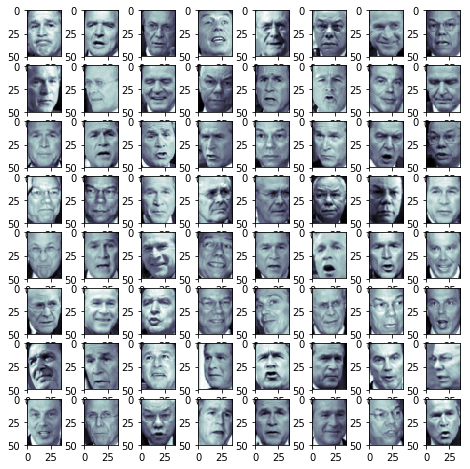

In [8]:
fig = plt.figure(figsize = [8,8])
for i in range(64):
    ax = fig.add_subplot(8,8,i+1) #this devide figure in 8 col and rows and start to fill at i+1 position(i+1 ,because i start from 0)
    ax.imshow(lfw.images[i] , cmap = plt.cm.bone) #this is used to fill images at each of 64 subplots,cmap = color map
plt.show()

In [32]:
x = lfw.data
y = lfw.target
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [33]:
pca = decomposition.PCA()
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [34]:
# Finding min no. of features we need 
total = sum(pca.explained_variance_)
current_var = 0
k = 0
while current_var/total < 0.99 : # we want 95% variance
    current_var += pca.explained_variance_[k]
    k += 1
k

316

In [35]:
pca = decomposition.PCA(n_components = k , whiten = True) # In images 'Whiten' will kind of scale the data and is sometime useful
transformed_data = pca.fit_transform(x_train)
transformed_data.shape

(855, 316)

In [36]:
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape

(855, 1850)

In [37]:
# we will get it back to image form of 400x64x64
x_approx_image = x_approx.reshape((855,50,37))

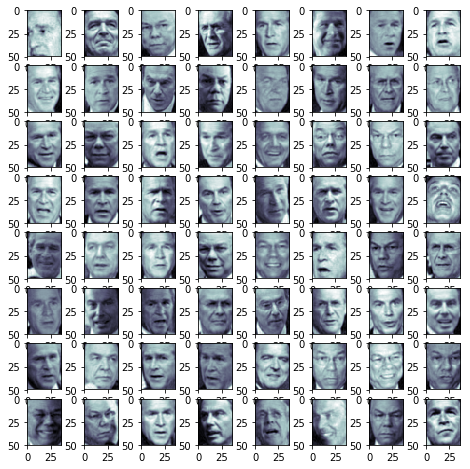

In [38]:
fig = plt.figure(figsize = [8,8])
for i in range(64):
    ax = fig.add_subplot(8,8,i+1) #this devide figure in 8 col and rows and start to fill at i+1 position(i+1 ,because i start from 0)
    ax.imshow(x_approx_image[i] , cmap = plt.cm.bone) #this is used to fill images at each of 64 subplots,cmap = color map
plt.show()

In [42]:
#Now we use our model 

In [41]:
x_train_pca = transformed_data
x_test_pca = pca.transform(x_test)

In [48]:
# First without PCA

In [47]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train,y_train)
end = time.time()
y_pred = rf.predict(x_test)
print("Time :",end-start)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Time : 0.19448423385620117
              precision    recall  f1-score   support

           0       0.67      0.62      0.64        61
           1       0.47      0.25      0.33        36
           2       0.59      0.90      0.71       122
           3       0.67      0.19      0.30        31
           4       0.71      0.29      0.41        35

   micro avg       0.61      0.61      0.61       285
   macro avg       0.62      0.45      0.48       285
weighted avg       0.62      0.61      0.57       285

[[ 38   2  20   0   1]
 [  7   9  18   0   2]
 [  9   2 110   1   0]
 [  2   2  20   6   1]
 [  1   4  18   2  10]]


In [49]:
# Now with PCA data

In [50]:
rf = ensemble.RandomForestClassifier()
start = time.time()
rf.fit(x_train_pca,y_train)
end = time.time()
y_pred = rf.predict(x_test_pca)
print("Time :",end-start)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Time : 0.10492110252380371
              precision    recall  f1-score   support

           0       0.50      0.36      0.42        61
           1       0.45      0.14      0.21        36
           2       0.53      0.93      0.67       122
           3       0.60      0.10      0.17        31
           4       0.12      0.03      0.05        35

   micro avg       0.51      0.51      0.51       285
   macro avg       0.44      0.31      0.30       285
weighted avg       0.47      0.51      0.43       285

[[ 22   2  33   0   4]
 [  5   5  23   0   3]
 [  6   2 114   0   0]
 [  5   0  23   3   0]
 [  6   2  24   2   1]]


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
